In [1]:
#loading the dataset
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
mnist["details"]

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'description_version': '2',
 'format': 'ARFF',
 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'],
 'upload_date': '2014-09-29T03:28:38',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/52667/mnist_784.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0554/dataset_554.pq',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0554/dataset_554.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [3]:
X=mnist["data"]
Y=mnist["target"]
X.shape

(70000, 784)

In [4]:
Y.shape

(70000,)

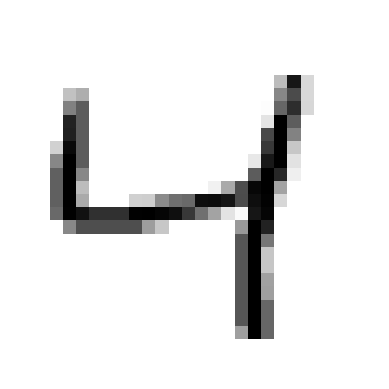

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#displaying some random digit from mnist dataset
X=np.array(X)
random=X[2]
random_im=random.reshape(28,28)
plt.imshow(random_im,cmap="binary")
plt.axis("off")
plt.show()

In [6]:
Y.iloc[2]

'4'

In [7]:
import numpy as np
y=Y.astype(np.uint8)

In [8]:
y[2]

4

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(X,test_size=0.2,random_state=42)
y_train,y_test=train_test_split(y,test_size=0.2,random_state=42)

In [10]:
#training a binary classifier
# 5 detector (5 or not 5)
y_train_4=(y_train==4)
y_test=(y_test==4)

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_4)

SGDClassifier(random_state=42)

In [12]:
sgd_clf.predict(X[2].reshape(1,-1))

array([ True])

In [13]:
y=np.array(Y)

In [20]:
sgd_clf.n_features_in_

784

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds=StratifiedKFold(n_splits=3,random_state=42,shuffle=True)
for train_index,test_index in skfolds.split(X_train,y_train):
    clone_clf=clone(sgd_clf)
    X_train_folds=X_train[train_index]
    y_train_folds=y_train_4.iloc[train_index]
    X_test_folds=X_train[test_index]
    y_test_folds=y_train_4.iloc[test_index]

clone_clf.fit(X_train_folds,y_train_folds)
y_pred=clone_clf.predict(X_test_folds)
n_correct=sum(y_pred==y_test_folds)
print(n_correct/len(y_pred))

0.9788921032894032


In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train-4,cv=3,scoring="accuracy")

array([0.88444849, 0.88509134, 0.8756027 ])

In [23]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_4,cv=3)

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_4,y_train_pred)

array([[49782,   689],
       [  629,  4900]], dtype=int64)

In [25]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_4,y_train_pred)

0.8767221327607801

In [26]:
recall_score(y_train_4,y_train_pred)

0.8862362090793995

In [27]:
from sklearn.metrics import f1_score
f1_score(y_train_4,y_train_pred)

0.881453498830725

In [28]:
y_score=cross_val_predict(sgd_clf,X_train,y_train_4,cv=3,method="decision_function")

In [29]:
from sklearn.metrics import precision_recall_curve
precision,recall,threshold=precision_recall_curve(y_train_4,y_score)

In [30]:
def plot_pvsr(precision,recall,threshold):
    plt.plot(threshold,precision[:-1],"b--",label="p")
    plt.plot(threshold,recall[:-1],"g--",label="r")
    [...]

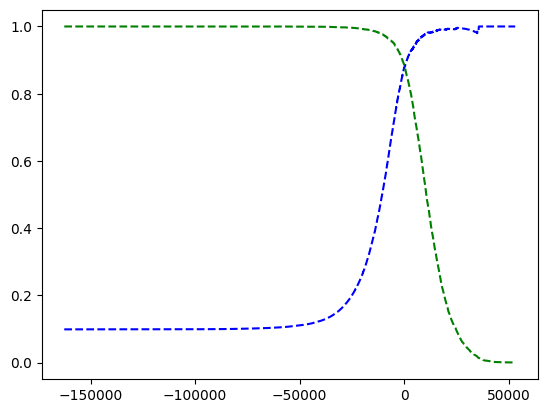

In [31]:
plot_pvsr(precision,recall,threshold)
plt.show()

In [25]:
from sklearn.metrics import precision_recall_curve
precision,recall,threshold=precision_recall_curve(y_train_4,y_score)
threshold=threshold[np.argmax(precision>=0.95)]

In [26]:

precision_score(y_train_4,y_score>=threshold)

0.95

In [27]:
from sklearn.svm import SVC
svm_clf=SVC()
svm_clf.fit(X_train,y_train)
svm_clf.predict([random])

array([4], dtype=uint8)

In [28]:
v=svm_clf.decision_function([random])
v

array([[ 0.71972929, -0.30147348,  5.23141425,  6.21759894,  9.30394852,
         3.8580259 ,  1.78869913,  7.25344816,  2.73548552,  8.25747812]])

In [29]:
np.argmax(v)

4

In [30]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [31]:
svm_clf.classes_[4]

4

In [32]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf=OneVsRestClassifier(SVC())
ovr_clf.fit(X_train,y_train)

OneVsRestClassifier(estimator=SVC())

In [33]:
ovr_clf.predict([random])

array([4], dtype=uint8)

In [34]:
sgd_clf(X_train,y_train)
sgd_clf.predict([random)]

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (2069588698.py, line 2)

In [ ]:
sgd_clf.decision_function([random])

In [ ]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring="accuracy")

In [ ]:
y_train_pred=cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
con_mat=confusion_matrix(y_train,y_train_pred)

In [ ]:
#multilabel classification
from sklearn.neighbors import KneighborsClassifier
y_train_large=(y_train>=7)
y_train_odd=(y_train%2=1)
y_multilabel=np.c_[y_train_large,y_train_odd]

knn_clf=KNeighborsClassifier()
knn.clf.fit(X_train,y_multilabel)

In [ ]:
knn_clf.predict([random])

In [ ]:
y_train_knn_pred=cross_val_pred(knn_clf,X_train,y_multilabel,cv=3)
f1_score(y_multilabel,y_train_knn_pred,average="macro")

In [ ]:
#multioutput classification
